# Problem Statement


To predict the salary of employee based on the information provided in the dataset.

## How will the company profit from this solution?
1. Companies can't keep track of their finance while paying salaries to employees.
2. Companies can understand what factors affects their finance. for example: location , employee experience, education qualification, etc.
3. Companies can get data about their competition companies finance and improve their own on basis of that data.
4. They can get an optimized range of salaries that should be given to their employees based on factors such as job type, employee experience, Education qualification, etc. that will reduce spending of extra  money.

## How will the employee profit from this solution?

1. Employees find it difficult to know what factors affect their salaries.
2. Employees can find companies matching their salary requirement based on job title, experience, etc.
3. They can understand what factor is affecting their salaries so they can improve working on that factor. 
4. They can get data about salaries paid by other companies for same job title, experience, education qualification, etc so they can to get a raise in their salaries.



## Dataset Desciption

The dataset folder contains the following files:

train_dataset.csv = 1000000 x 8

train_salaries.csv = 1000000 x 2

test_dataset.csv =  1000000 x 8

Columns Provided in the Dataset

1. jobId
2. companyId
3. jobType
4. degree
5. major
6. industry
7. yearsExperience
8. milesFromMetropolis
9. salary

In [7]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
 #Load the train_dataset, train_salaries, test_dataseta
from google.colab import files
uploaded1 = files.upload()
uploaded2 = files.upload()
uploaded3 = files.upload()
df_train=pd.read_csv("train_dataset.csv")
df_salaries=pd.read_csv("train_salaries.csv")
df_test=pd.read_csv("test_dataset.csv")

Saving train_salaries.csv to train_salaries.csv


Saving train_dataset.csv to train_dataset.csv


Saving test_dataset.csv to test_dataset.csv


In [9]:
df_train.head()

jobId companyId  ... yearsExperience milesFromMetropolis
0  JOB1362684407687    COMP37  ...              10                  83
1  JOB1362684407688    COMP19  ...               3                  73
2  JOB1362684407689    COMP52  ...              10                  38
3  JOB1362684407690    COMP38  ...               8                  17
4  JOB1362684407691     COMP7  ...               8                  16

[5 rows x 8 columns]

In [10]:
len(df_train)

1000000

In [11]:
df_salaries.head()

jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

In [12]:
# Adding salary data to train_dataset
df_final=pd.merge(df_train,df_salaries)

In [13]:
df_final.head()

jobId companyId  ... milesFromMetropolis salary
0  JOB1362684407687    COMP37  ...                  83    130
1  JOB1362684407688    COMP19  ...                  73    101
2  JOB1362684407689    COMP52  ...                  38    137
3  JOB1362684407690    COMP38  ...                  17    142
4  JOB1362684407691     COMP7  ...                  16    163

[5 rows x 9 columns]

# Basic EDA

## Identifying the number of features or columns

## Know all the names of the columns¶

In [14]:
# get all column names
df_final.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

## Knows more about the data in the columns like data type it contains and total samples of each

In [15]:
# Check which columns are having categorical, numerical or boolean values of train_dataset
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


1. After checking the Dtypes of all the columns 
    1. object - String values
    1. int64 - Numerical values
1. There are more String values than the numerical values in the dataset

## Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [16]:
# For train_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  
df_final.describe()

yearsExperience  milesFromMetropolis          salary
count   1000000.000000       1000000.000000  1000000.000000
mean         11.992386            49.529260      116.061818
std           7.212391            28.877733       38.717936
min           0.000000             0.000000        0.000000
25%           6.000000            25.000000       88.000000
50%          12.000000            50.000000      114.000000
75%          18.000000            75.000000      141.000000
max          24.000000            99.000000      301.000000

In [17]:
# for test_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns
df_test.describe()

yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.213179            28.889713
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000

##the total number of samples in the dataset.

In [18]:
# len of train and test dataset
print("train data length:",len(df_final))
print("test data length:",len(df_test))

train data length: 1000000
test data length: 1000000


## unique values

In [19]:
#how many unique values are in train_dataset
for i in df_final:
  print(str(i)+":",str(len(df_final[i].unique())))

jobId: 1000000
companyId: 63
jobType: 8
degree: 5
major: 9
industry: 7
yearsExperience: 25
milesFromMetropolis: 100
salary: 280


In [20]:
# how many unique values are in test_dataset
for i in df_test:
  print(str(i)+":",str(len(df_final[i].unique())))

jobId: 1000000
companyId: 63
jobType: 8
degree: 5
major: 9
industry: 7
yearsExperience: 25
milesFromMetropolis: 100


## Counting the total number of missing values¶

In [21]:
# Checking for missing values in all the columnns of the train_dataset
df_final.isna().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [22]:
 # Checking for missing values in all the columnns of the test_dataset
 df_test.isna().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

# By the observation gather from the train_data.info(), we can know there are no missing values in the train and test dataset

 removing 'jobId' and 'companyId' data from train and test data as they are specific for a person and dont add value to our prediction.

In [23]:

# drop jobId and companyId from train_dataset
df_final.drop(labels=["jobId","companyId"],axis=1,inplace=True)
df_final.head()

jobType       degree  ... milesFromMetropolis salary
0             CFO      MASTERS  ...                  83    130
1             CEO  HIGH_SCHOOL  ...                  73    101
2  VICE_PRESIDENT     DOCTORAL  ...                  38    137
3         MANAGER     DOCTORAL  ...                  17    142
4  VICE_PRESIDENT    BACHELORS  ...                  16    163

[5 rows x 7 columns]

In [24]:

# drop jobId and companyId from test_dataset
df_test.drop(labels=["jobId","companyId"],axis=1,inplace=True)
df_test.head()

jobType       degree    major industry  yearsExperience  milesFromMetropolis
0  MANAGER  HIGH_SCHOOL     NONE   HEALTH               22                   73
1   JUNIOR         NONE     NONE     AUTO               20                   47
2      CTO      MASTERS  BIOLOGY   HEALTH               17                    9
3  MANAGER  HIGH_SCHOOL     NONE      OIL               14                   96
4   JUNIOR     DOCTORAL  BIOLOGY      OIL               10                   44



By observing the train_data.info() cell, we can biforcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

1. jobType
2. degree
3. major
4. industry

In [25]:
# creating two empty list to store categorical column names and numerical column names respectively
nums=[]
cats=[]
# looping on whole dataset for geting list of categorical and numerical data column name and storing in respective list variable
for col in df_final:
  if df_final[col].dtype=="int64":
    nums.append(col)
  else:
    cats.append(col)
print(cats)
print(nums)


['jobType', 'degree', 'major', 'industry']
['yearsExperience', 'milesFromMetropolis', 'salary']


## Correlation Matrix


#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [26]:
# Correlation metrix using pandas
corr=df_final[nums].corr()
corr

yearsExperience  milesFromMetropolis    salary
yearsExperience             1.000000             0.000673  0.375013
milesFromMetropolis         0.000673             1.000000 -0.297666
salary                      0.375013            -0.297666  1.000000

## From above correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have no correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

## Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [27]:
# import necessary libraries for chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# creating function for performing chi-sqaure test on two columns
def perform_chi_test(var_1,var_2):
    
    #Contingency Table
    contingency_table=pd.crosstab(df_final[var_1],df_final[var_2])
    
    #Observed Values
    observed_values=contingency_table.values
    
    #Expected Values
    b=chi2_contingency(contingency_table)
    expected_values=b[3]
    #Degree of Freedom
    no_of_rows=len(contingency_table.iloc[0:,0])
    no_of_columns=len(contingency_table.iloc[0,0:])
    degree_f=(no_of_rows-1)*(no_of_columns-1)
    print("Degree of freedom: ",degree_f)
    
    #Significance Level 5%
    alpha=0.05
    print("Significance level: ",alpha)
    
    #chi-square statistic
    chi_square=sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    print("chi-square characteristics",chi_square_statistic)
    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=degree_f)
    print("critical value: ",critical_value)
    #p-value
    p_value=1-chi2.cdf(x=chi_square_statistic,df=degree_f)
    print("p-value: ",p_value)
    # conditional statements for checking chi-sqaure test condition for hypothesis selection based on chi_square_statistic and critical_value     
    if chi_square_statistic>=critical_value:
      print("Reject HO,There is a relationship between 2 categorical variables")
    else:
      print("Reject HO,There is no relationship between 2 categorical variables")
    if p_value<=alpha:
       print("Reject HO,There is a relationship between 2 categorical variables")
    else:
      print("Reject HO,There is no relationship between 2 categorical variables")
    # conditional statements for checking chi-sqaure test condition for hypothesis selection based on p_value and alpha

In [28]:

# looping on categorical data list and use function for performing chi-square test on columns from dataset
for i in cats:
  for j in cats:
    if i!=j:
      print(i,j)
      perform_chi_test(i,j)
      print("---------------------------------------------------------------")


jobType degree
Degree of freedom:  28
Significance level:  0.05
chi-square characteristics 50117.72406771936
critical value:  41.33713815142739
p-value:  0.0
Reject HO,There is a relationship between 2 categorical variables
Reject HO,There is a relationship between 2 categorical variables
---------------------------------------------------------------
jobType major
Degree of freedom:  56
Significance level:  0.05
chi-square characteristics 16703.025256041707
critical value:  74.46832415930936
p-value:  0.0
Reject HO,There is a relationship between 2 categorical variables
Reject HO,There is a relationship between 2 categorical variables
---------------------------------------------------------------
jobType industry
Degree of freedom:  42
Significance level:  0.05
chi-square characteristics 14.913329934821567
critical value:  58.12403768086803
p-value:  0.9999643570205455
Reject HO,There is no relationship between 2 categorical variables
Reject HO,There is no relationship between 2 cate

From above chi-square test:

- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major


## Scatter Plot



1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.


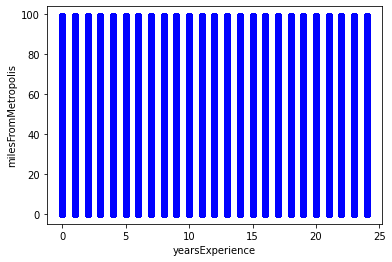

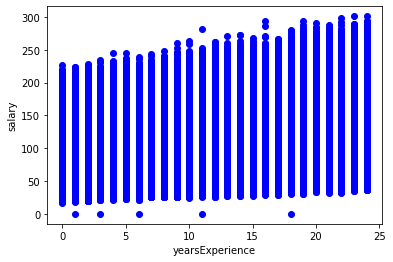

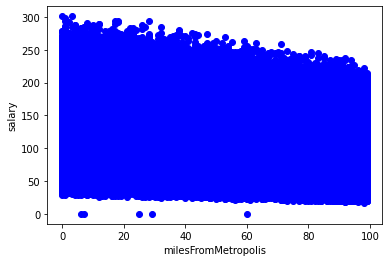

In [29]:
# Scatter plot using matplotlib 
# create function for ploting scatterplot between two columns of dataset
def scatter1(x,y,i,j):
  plt.scatter(x, y, c ="blue")
  plt.xlabel(i)
  plt.ylabel(j)
  plt.show()

for i in range(0,len(nums)):
  for j in range(i+1,len(nums)):
    scatter1(df_final[nums[i]],df_final[nums[j]],nums[i],nums[j])
      


From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on 
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

## Histogram



1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59ab0d6310>,
      dtype=object)

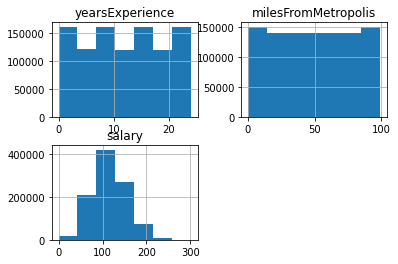

In [30]:
# Histogram using pandas 
hists=df_final[nums].hist(bins=7)
hists

From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)


## Box Plot

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset


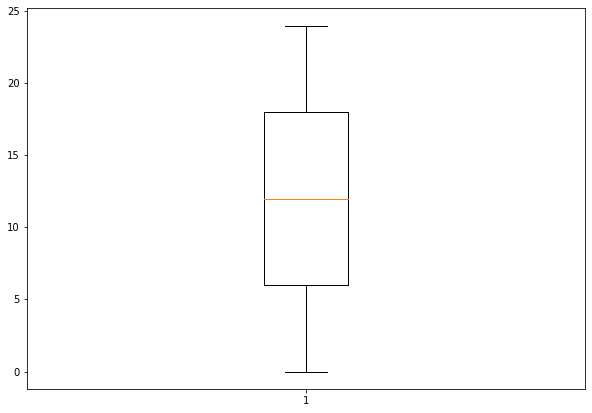

In [33]:
# box plot using pandas 
# box plot for yearsExperience column
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df_final["yearsExperience"])
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

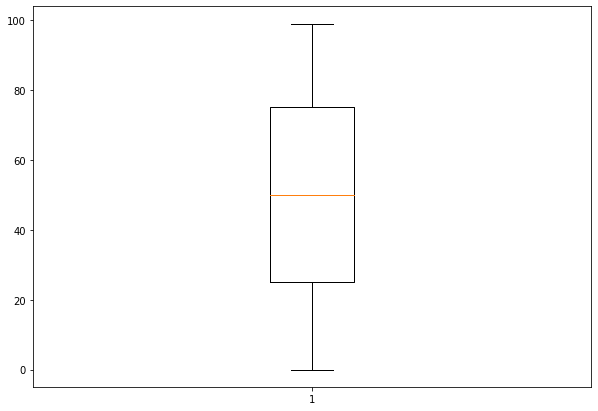

In [34]:
# box plot using pandas 
# box plot for milesFromMetropolies column
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df_final["milesFromMetropolis"])
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

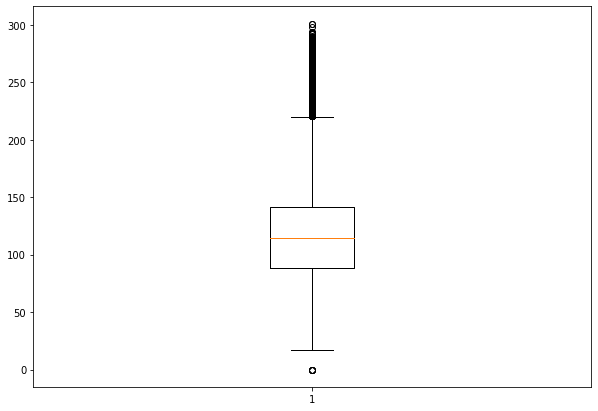

In [35]:
# box plot using pandas 
# box plot for salary column
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df_final["salary"])
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The mean salary is around 120


## Violin Plot



1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

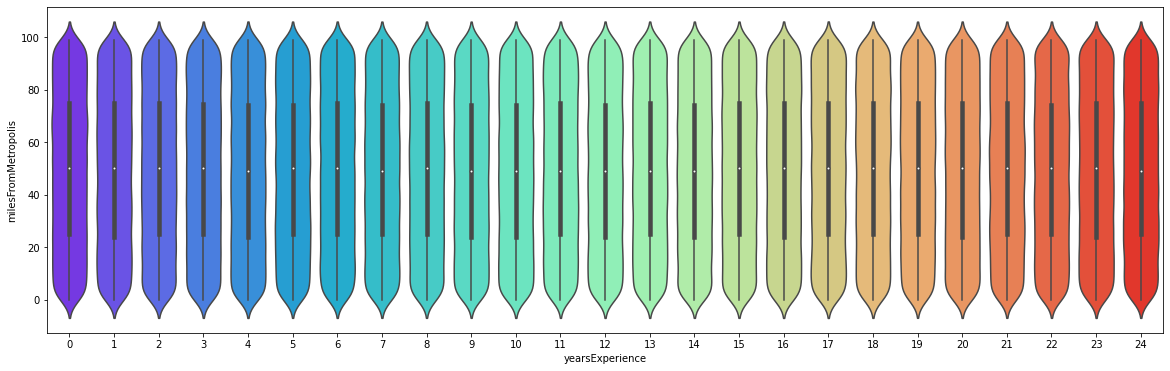

In [36]:
# violin plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience', y='milesFromMetropolis', data=df_final, palette='rainbow')

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

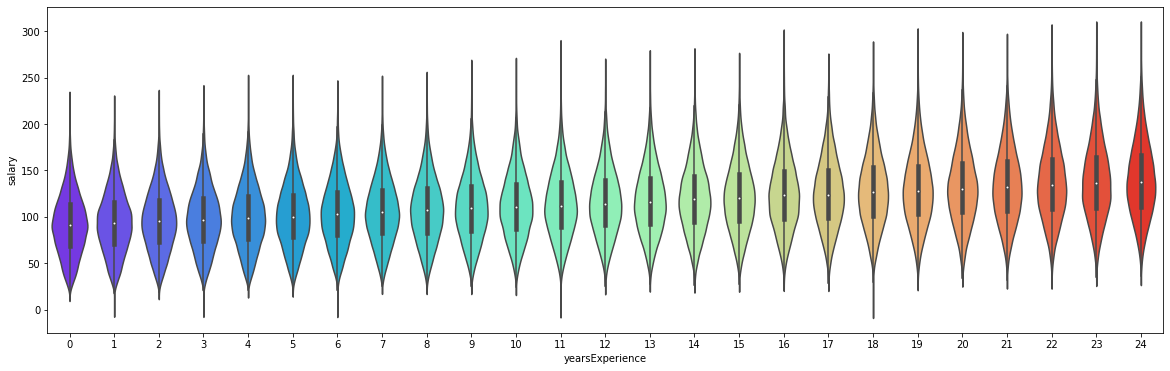

In [37]:
# violin plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience', y='salary', data=df_final, palette='rainbow')

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

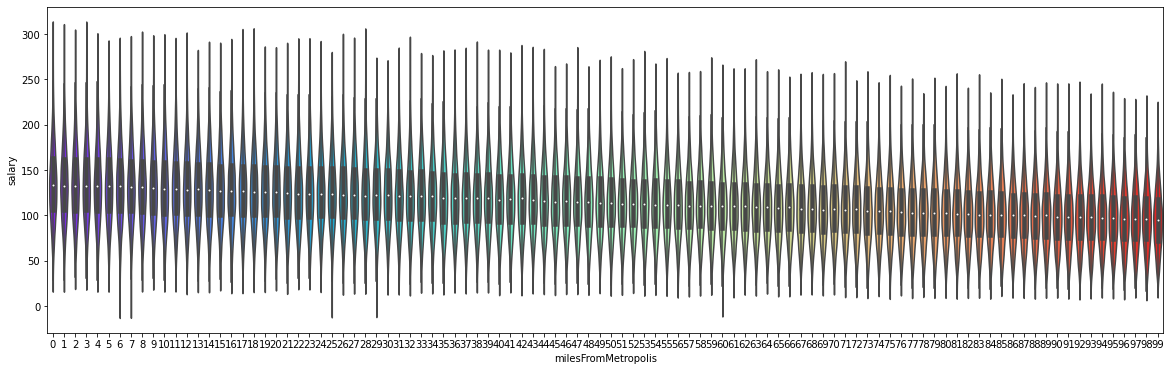

In [38]:
# violin plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x='milesFromMetropolis', y='salary', data=df_final, palette='rainbow')

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Point Plot


1. A point plot uses scatter plot glyphs to visualize features like point estimates and confidence intervals.

2. A point plot uses scatter plot points to represent the central tendency of numeric data.

3. These plots make use of error bars to indicate any uncertainty around the numeric

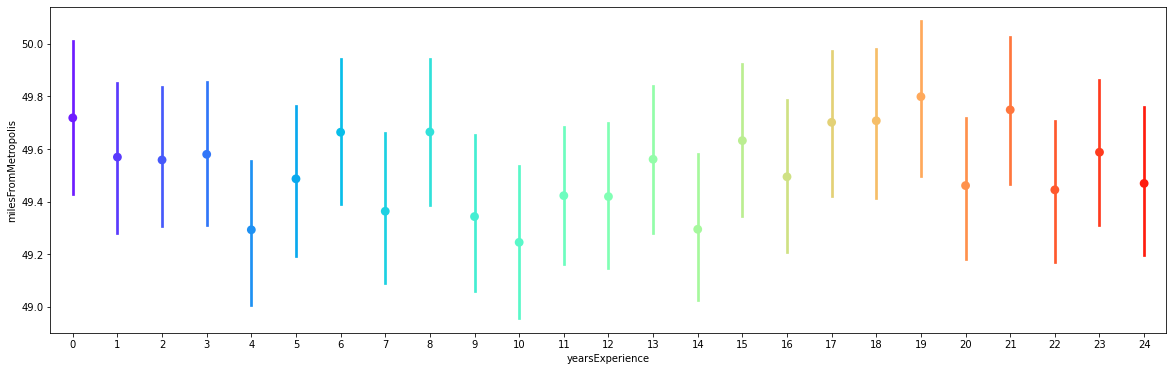

In [39]:
# point plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,6))
sns.pointplot(x='yearsExperience', y='milesFromMetropolis', data=df_final, palette='rainbow')

From above point plot

The error bar shows that there is variability of association with each Y and X center point value. that is the milesFromMetropolis has dispersion of vales for each yearsExperience value

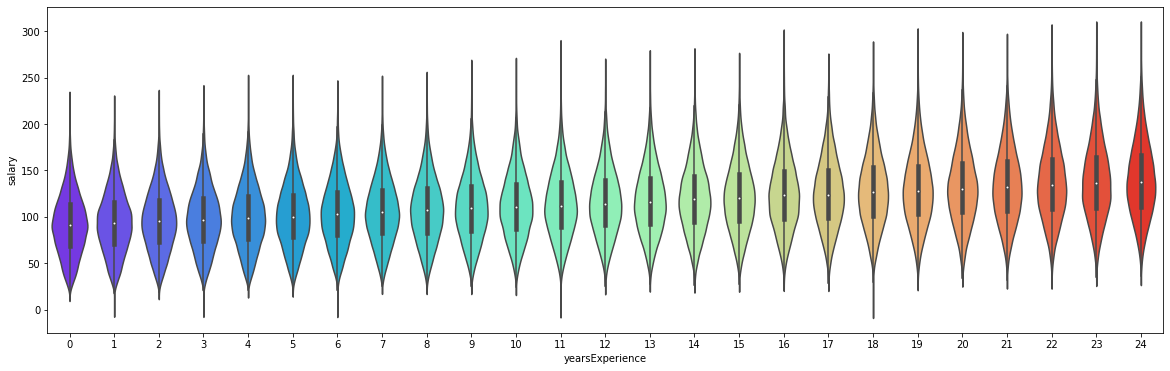

In [40]:
# point plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x='yearsExperience', y='salary', data=df_final, palette='rainbow')

From above point plot

There is a increase in salary when there is a increase in yearsExperience

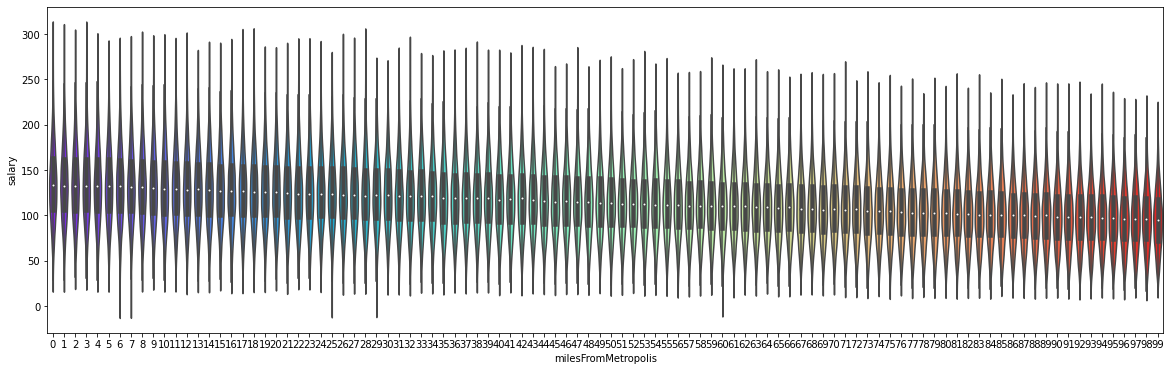

In [41]:
# point plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))
sns.violinplot(x='milesFromMetropolis', y='salary', data=df_final, palette='rainbow')

From above point plot

There is a decrease in salary when there is a decrease in yearsExperience

## Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


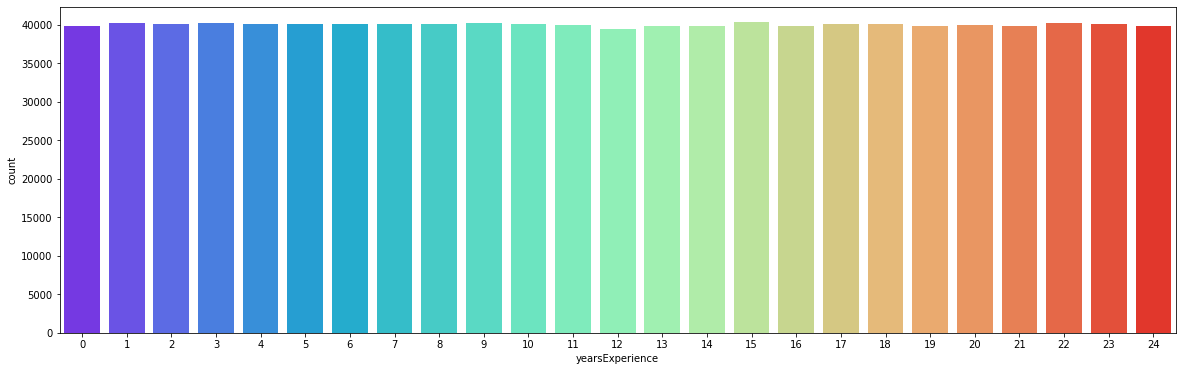

In [42]:
# count plot of whole dataset based on yearsExperience
plt.figure(figsize=(20,6))
sns.countplot(x='yearsExperience', data=df_final, palette='rainbow')

From above count plot

distribution of values of yearExperience is equal over complete dataset, symmetrical.

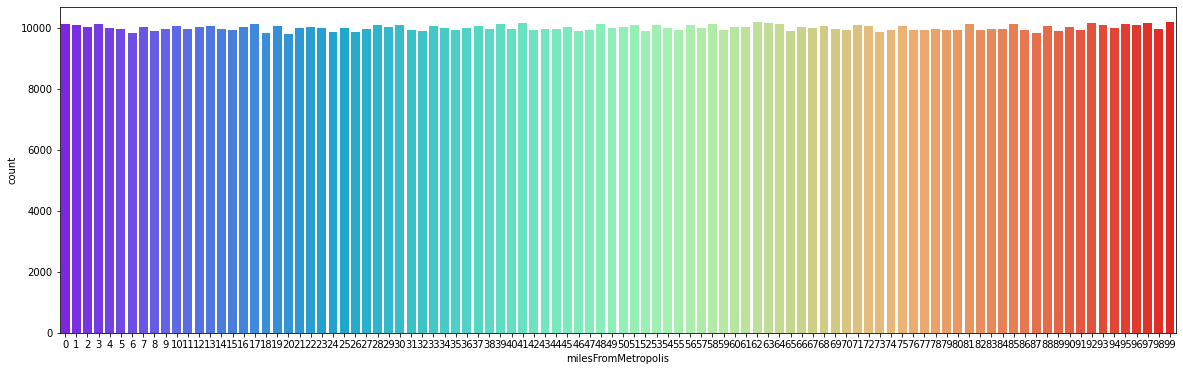

In [43]:
# count plot of whole datset based on milesFromMetropolis
plt.figure(figsize=(20,6))
sns.countplot(x='milesFromMetropolis', data=df_final, palette='rainbow')

From above count plot

distribution of values of milesFromMetropolis is almost equal over complete dataset, symmetrical

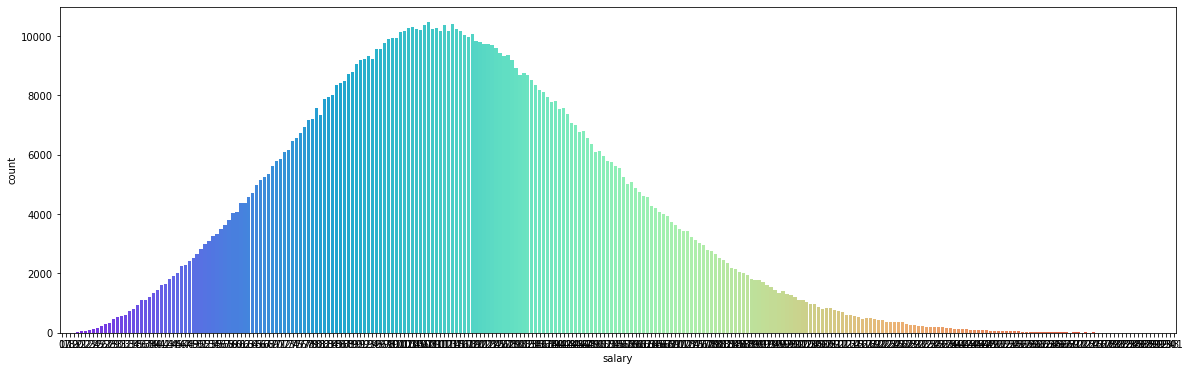

In [44]:
# count plot of whole datset based on salary
plt.figure(figsize=(20,6))
sns.countplot(x='salary', data=df_final, palette='rainbow')

From above count plot

distribution of values of yearExperience is symmetrical, unimodal.

## Subset of train dataset

ploting process of swarm plot was taking huge time because of large dataset.

So, we take a subset of 50000 samples from train datset and plot it for interpretation.

## Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


plot data on 50000 of 1000000 sample for clear visualization.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 82.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 82.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 82.8% of the points cannot be placed; y

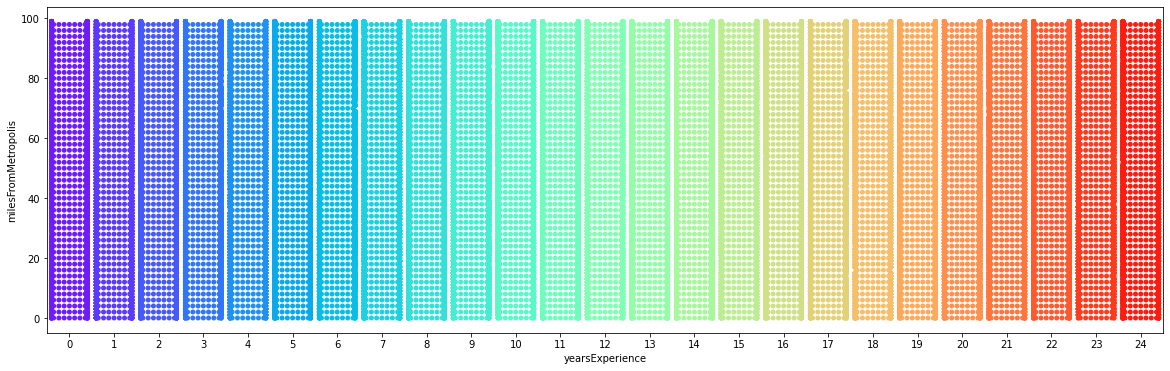

In [45]:
# swarm plot for yearsExperience and milesFromMetropolis columns
plt.figure(figsize=(20,6))
sns.swarmplot(x='yearsExperience',y='milesFromMetropolis' ,data=df_final.iloc[:50000,:], palette='rainbow')

From above swarm plot

distribution of values of yearExperience with respect to milesFromMetropolis is equal over complete dataset, symmetrical.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 89.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 88.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 88.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 87.9% of the points cannot be placed; y

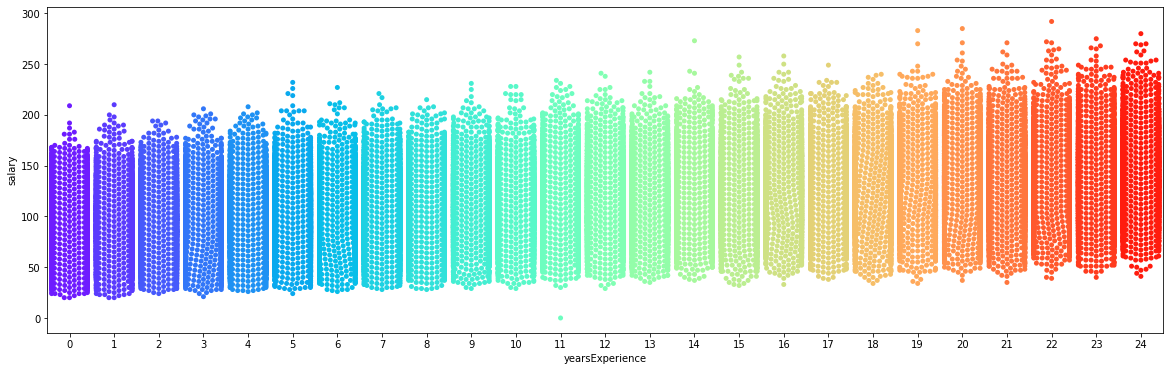

In [46]:
# swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(x='yearsExperience',y='salary' ,data=df_final.iloc[:50000,:], palette='rainbow')

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 87.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 88.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 86.8% of the points cannot be placed; y

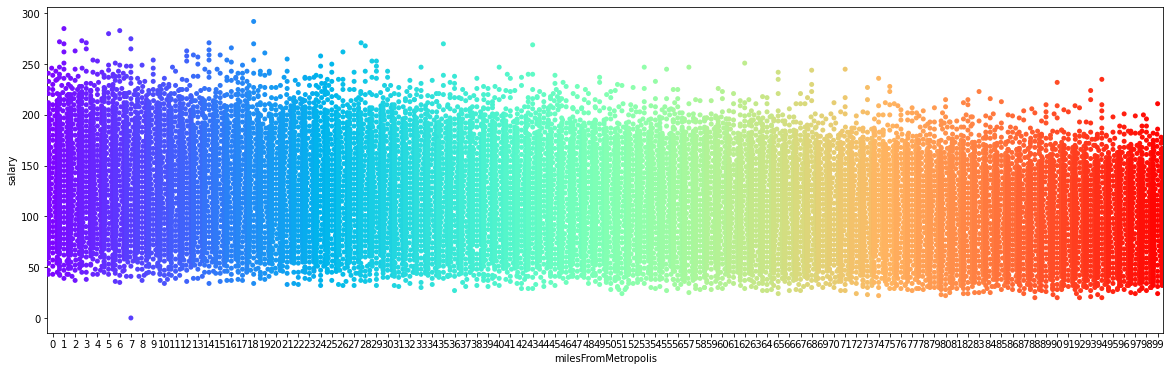

In [47]:
# swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(x='milesFromMetropolis',y='salary' ,data=df_final.iloc[:50000,:], palette='rainbow')

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Verticalal axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). 

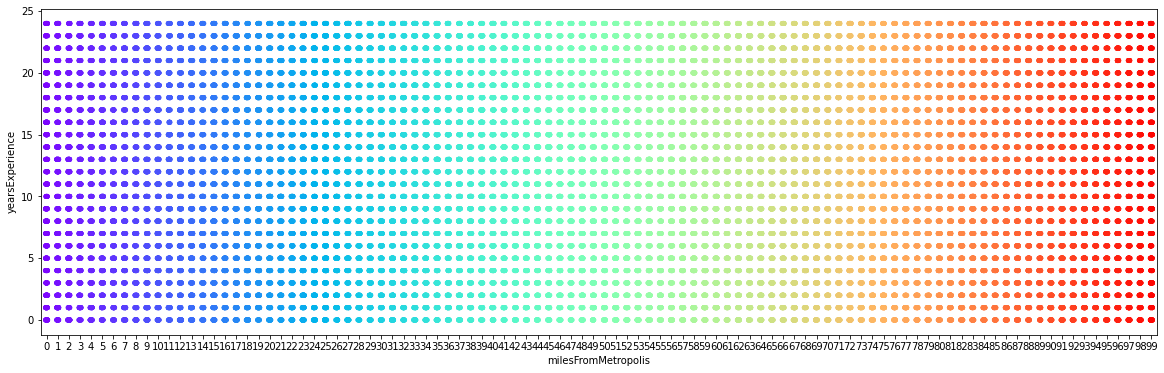

In [48]:

# strip plot between milesFromMetropolis and yearsExperience columns
plt.figure(figsize=(20,6))
sns.stripplot(x='milesFromMetropolis',y='yearsExperience' ,data=df_final.iloc[:50000,:], palette='rainbow')

from above strip plot:

Distribution of values of mileFromMetropolis is equal for each values of yearsExperience

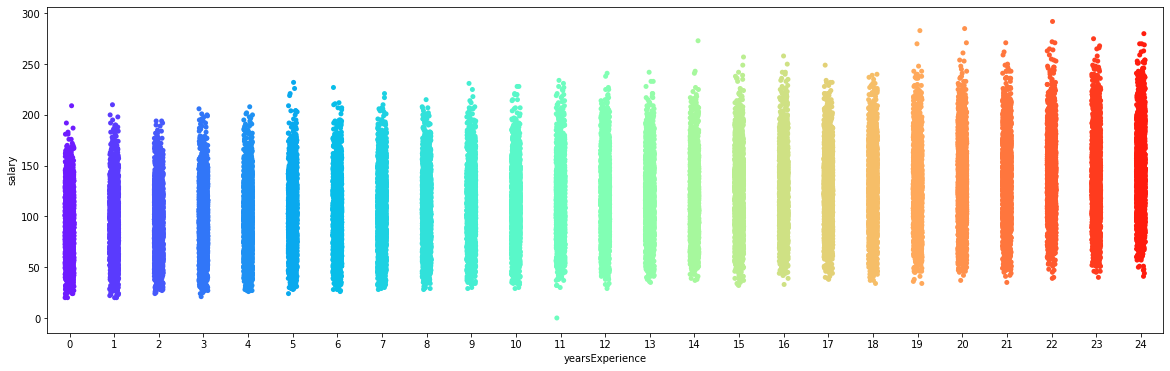

In [49]:
# strip plot between yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.stripplot(x='yearsExperience',y='salary' ,data=df_final.iloc[:50000,:], palette='rainbow')

from above strip plot:

Distribution of values of Salary increases for increase in values of yearsExperience

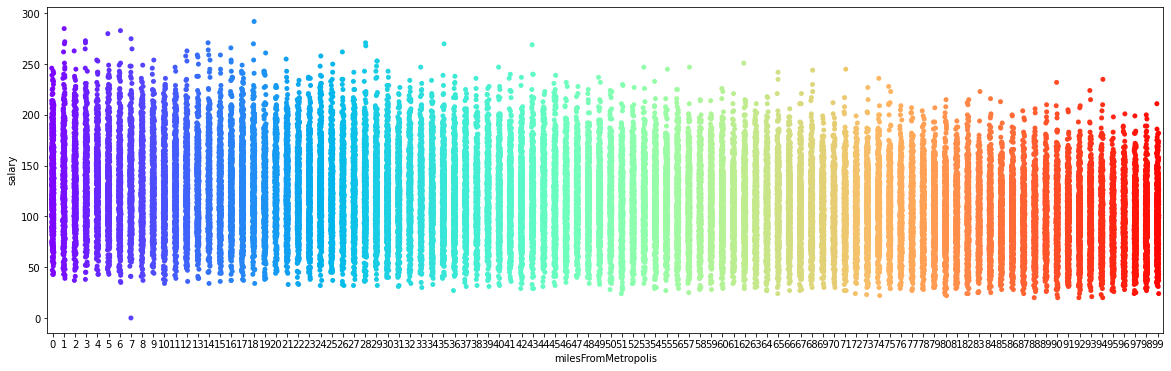

In [50]:
# strip plot between milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.stripplot(x='milesFromMetropolis',y='salary' ,data=df_final.iloc[:50000,:], palette='rainbow')

from above strip plot:

Distribution of values of Salary decreases for increase in values of milesFromMetropolis

## Variance inflation factor (VIF)

1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model. 
2. It is used for diagnosing collinearity/multicollinearity. 
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [51]:
# import statsmodle library for vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [52]:
df_final

jobType       degree  ... milesFromMetropolis salary
0                  CFO      MASTERS  ...                  83    130
1                  CEO  HIGH_SCHOOL  ...                  73    101
2       VICE_PRESIDENT     DOCTORAL  ...                  38    137
3              MANAGER     DOCTORAL  ...                  17    142
4       VICE_PRESIDENT    BACHELORS  ...                  16    163
...                ...          ...  ...                 ...    ...
999995  VICE_PRESIDENT    BACHELORS  ...                  94     88
999996             CTO  HIGH_SCHOOL  ...                  35    160
999997          JUNIOR  HIGH_SCHOOL  ...                  81     64
999998             CFO      MASTERS  ...                   5    149
999999          JUNIOR    BACHELORS  ...                  11     88

[1000000 rows x 7 columns]

In [53]:
# creating a dataframe of just numerical values from train_dataset
X = df_final[nums]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

               feature       VIF
0      yearsExperience  4.438314
1  milesFromMetropolis  2.592846
2               salary  4.962722


## ANOVA Test

### Normality Assumption Check

Before we perform the hypothesis test, we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.

### Homogeneity of variance Assumption Check

### Hypothesis Testing

According to five steps process of hypothesis testing:
H₀: μ₁= μ₂ = μ₃ = … = μ₆
H₁: Not all salary means are equal
α = 0.05
According to F test statistics:

In [54]:
# function to perform anova test between two variables.
def perform_anova_test(x,y):
  # creating dataframe of two variables of interest
  train_anova=df_final[[x,y]]
  # gouping the data in new dataframe
  groups=train_anova.groupby(x).count().reset_index()
  # print grouped data
  print(groups)

  
  # getting list of unique values from new dataframe for first variable
  unique_majors=train_anova[x].unique()
  # looping through each value present in list of unique values to plot probplot
  for major in unique_majors:
    stats.probplot(train_anova[train_anova[x]==major][y],dist="norm",plot=plt)
    plt.title("Probability Plot: "+ major)
    plt.show()

  # calculate ratio of the largest to the smallest sample standard deviation
  ratio=train_anova.groupby(x).std().max()/train_anova.groupby(x).std().min()
  print(ratio)


  # Create ANOVA backbone table with empty string value, columns names -> 'Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit'
  data=[['Between Groups','','','','','',''],['Within Groups','','','','','',''],['Total','','','','','','']]
  anova_table=pd.DataFrame(data,columns=['Souce of Variation','SS','df','MS','F','P-value','F crit'])
  anova_table.set_index('Souce of Variation',inplace=True)
  # calculate SSTR and update anova table, with Source of variation = 'Between Groups'
  x_bar=train_anova[y].mean()
  SSTR=train_anova.groupby(x).count()*(train_anova.groupby(x).mean()-x_bar)**2
  anova_table['SS']['Between Groups']=SSTR[y].sum()
  # calculate SSE and update anova table, with Source of variation = 'Within Groups'
  SSE=(train_anova.groupby(x).count()-1)*train_anova.groupby(x).std()**2
  anova_table['SS']['Within Groups']=SSE[y].sum()
  # calculate SSTR and update anova table, with Source of variation = 'Total'
  SSTR=SSTR[y].sum()+SSE[y].sum()
  anova_table['SS']['Total']=SSTR
  # update degree of freedom, for each groups 'Between Groups', 'Within Groups', 'Total'
  anova_table['df']['Between Groups']=train_anova[x].nunique()-1
  anova_table['df']['Within Groups']=train_anova.shape[0]-train_anova[x].nunique()
  anova_table['df']['Total']=train_anova.shape[0]-1
  # calculate MS
  anova_table['MS']=anova_table['SS']/anova_table['df']
  # calculate F 
  F=anova_table['MS']['Between Groups']/anova_table['MS']['Within Groups']
  anova_table['F']['Between Groups']=F
  # p-value
  anova_table['P-value']['Between Groups']=1-stats.f.cdf(F,anova_table['df']['Between Groups'],anova_table['df']['Within Groups'])  

  # alpha value
  alpha=0.05
  # possible hypothesis types "right-tailed, left-tailed, two-tailed" , choose one type and calculate F critcial and add to backbone dataframe
  tail_hypothesiss="two-tailed"
  # Final ANOVA Table
  if tail_hypothesiss=="two-tailed":
    alpha/=2
  anova_table['F crit']['Between Groups']=stats.f.ppf(1-alpha,anova_table['df']['Between Groups'],anova_table['df']['Within Groups'])
  print(anova_table)
  

         major  salary
0      BIOLOGY   58379
1     BUSINESS   58518
2    CHEMISTRY   58875
3      COMPSCI   58382
4  ENGINEERING   58596
5   LITERATURE   58684
6         MATH   57801
7         NONE  532355
8      PHYSICS   58410


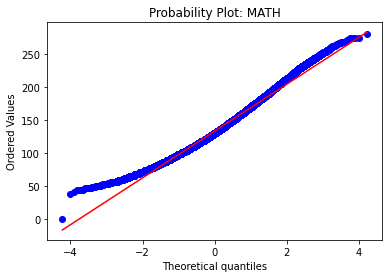

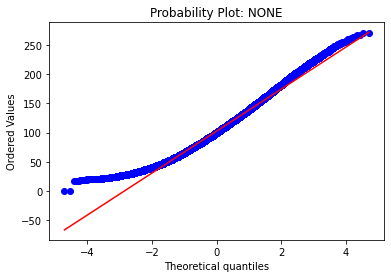

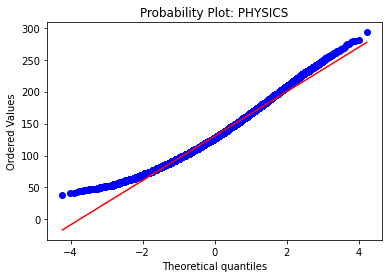

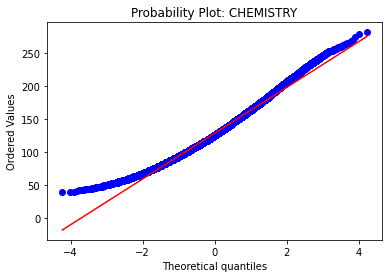

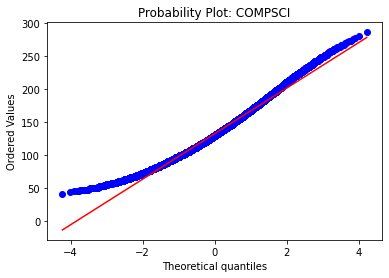

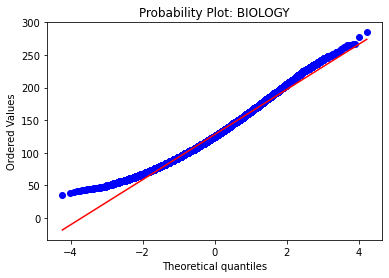

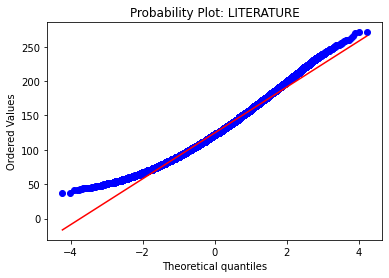

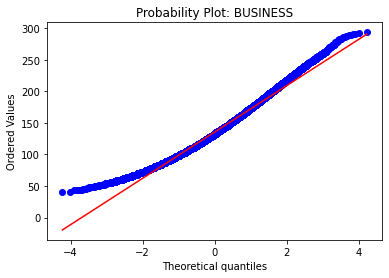

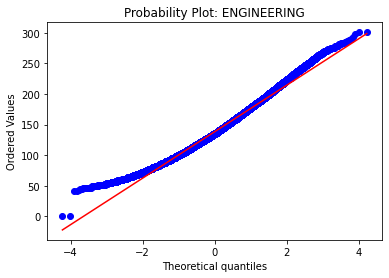

salary    1.137312
dtype: float64
                             SS      df  ...      P-value   F crit
Souce of Variation                       ...                      
Between Groups       2.1494e+08       8  ...  1.11022e-16  2.19183
Within Groups       1.28414e+09  999991  ...                      
Total               1.49908e+09  999999  ...                      

[3 rows x 6 columns]


In [55]:
# perform anova test on major and salary
perform_anova_test('major','salary')

          jobType  salary
0             CEO  124778
1             CFO  124369
2             CTO  125046
3         JANITOR  124971
4          JUNIOR  124594
5         MANAGER  125121
6          SENIOR  125886
7  VICE_PRESIDENT  125235


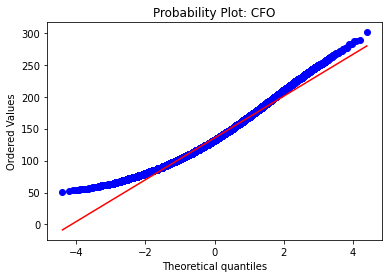

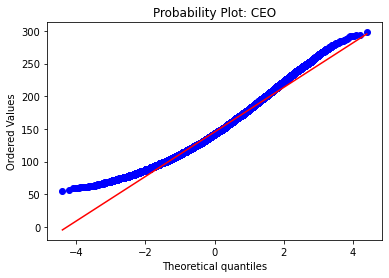

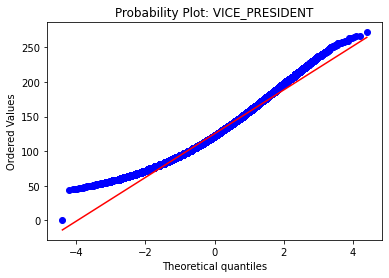

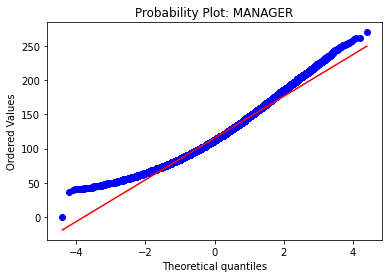

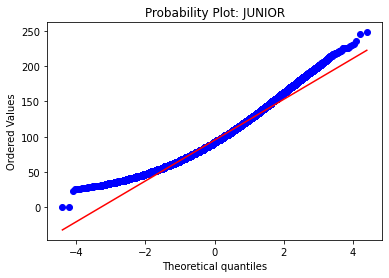

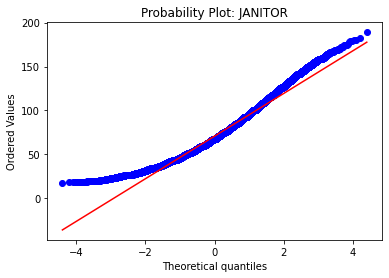

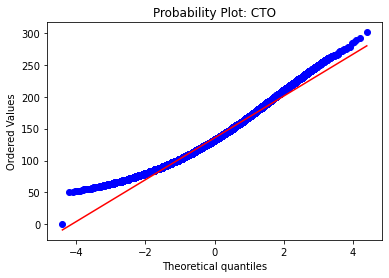

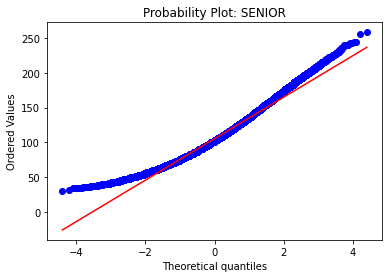

salary    1.3969
dtype: float64
                             SS      df  ...      P-value   F crit
Souce of Variation                       ...                      
Between Groups      5.35091e+08       7  ...  1.11022e-16  2.28755
Within Groups       9.63986e+08  999992  ...                      
Total               1.49908e+09  999999  ...                      

[3 rows x 6 columns]


In [56]:
# perform anova test on jobType and salary
perform_anova_test("jobType","salary")

        degree  salary
0    BACHELORS  175495
1     DOCTORAL  175364
2  HIGH_SCHOOL  236976
3      MASTERS  175311
4         NONE  236854


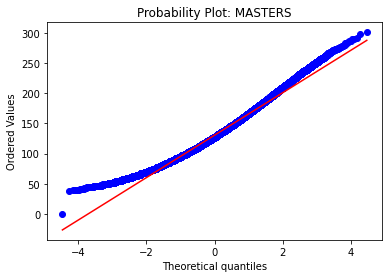

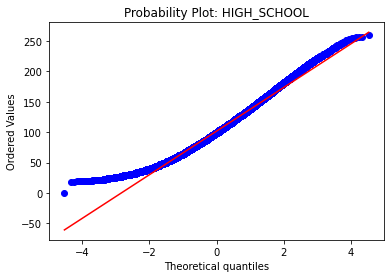

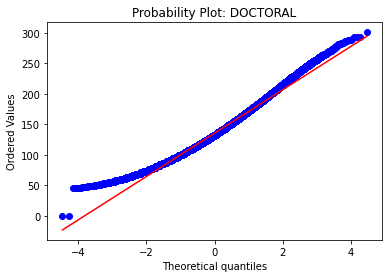

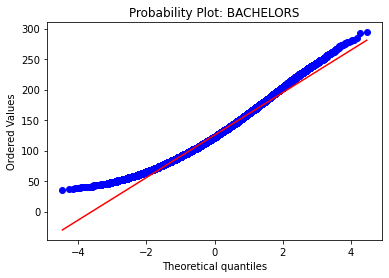

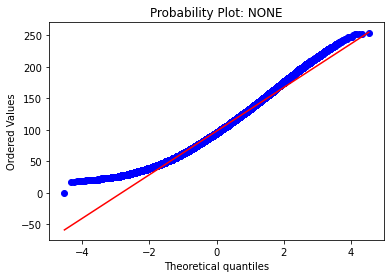

salary    1.034299
dtype: float64
                             SS      df  ...      P-value   F crit
Souce of Variation                       ...                      
Between Groups      2.41396e+08       4  ...  1.11022e-16  2.78583
Within Groups       1.25768e+09  999995  ...                      
Total               1.49908e+09  999999  ...                      

[3 rows x 6 columns]


In [57]:

# perform anova test on degree and salary
perform_anova_test("degree","salary")

    industry  salary
0       AUTO  142943
1  EDUCATION  142819
2    FINANCE  142867
3     HEALTH  142755
4        OIL  142771
5    SERVICE  142639
6        WEB  143206


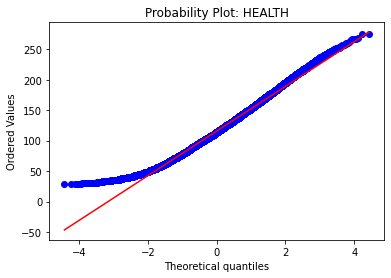

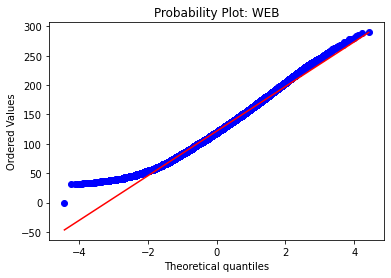

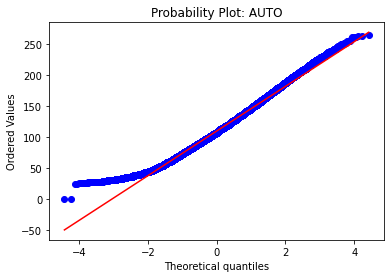

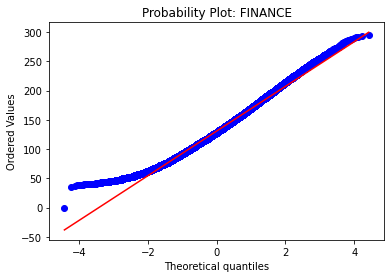

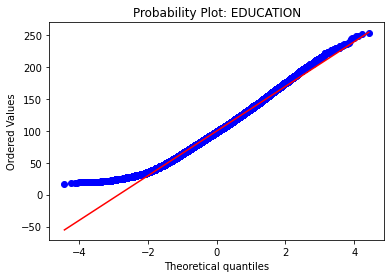

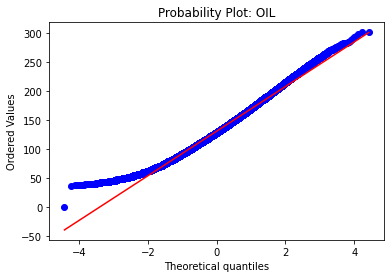

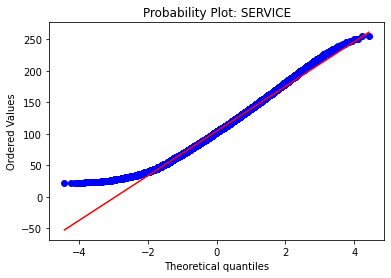

salary    1.0974
dtype: float64
                             SS      df  ...      P-value   F crit
Souce of Variation                       ...                      
Between Groups      1.31888e+08       6  ...  1.11022e-16  2.40824
Within Groups       1.36719e+09  999993  ...                      
Total               1.49908e+09  999999  ...                      

[3 rows x 6 columns]


In [58]:
# perform anova test on industry and salary
perform_anova_test("industry","salary")

          jobType  yearsExperience
0             CEO           124778
1             CFO           124369
2             CTO           125046
3         JANITOR           124971
4          JUNIOR           124594
5         MANAGER           125121
6          SENIOR           125886
7  VICE_PRESIDENT           125235


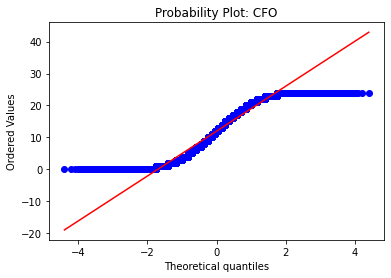

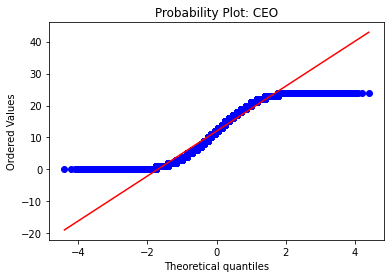

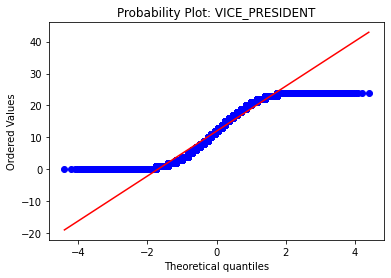

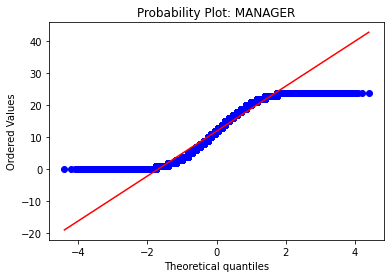

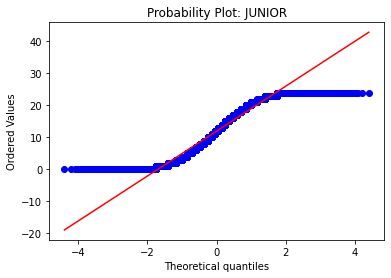

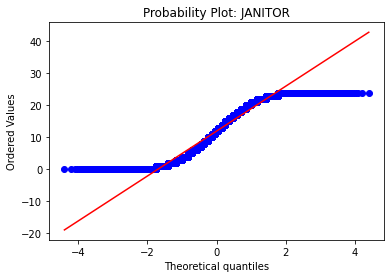

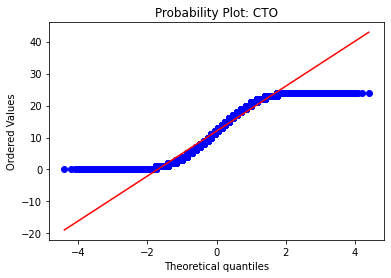

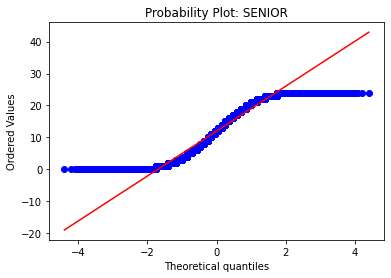

yearsExperience    1.002522
dtype: float64
                             SS      df       MS         F   P-value   F crit
Souce of Variation                                                           
Between Groups          117.457       7  16.7796  0.322567  0.944194  2.28755
Within Groups       5.20184e+07  999992  52.0188                             
Total               5.20185e+07  999999  52.0186                             


In [59]:
# perform anova test on jobType and yearsExperience
perform_anova_test("jobType","yearsExperience")

        degree  yearsExperience
0    BACHELORS           175495
1     DOCTORAL           175364
2  HIGH_SCHOOL           236976
3      MASTERS           175311
4         NONE           236854


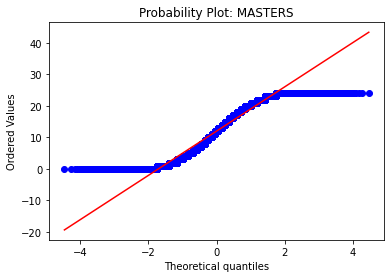

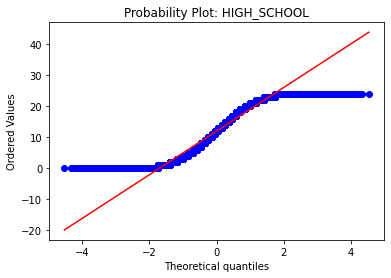

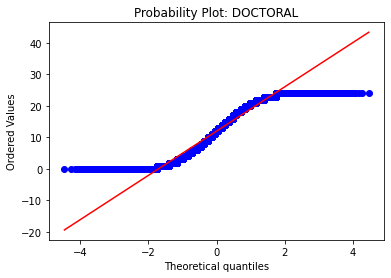

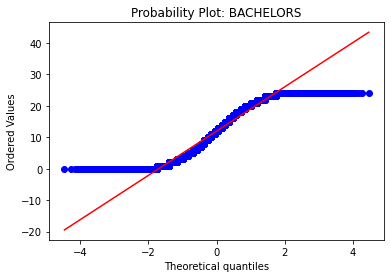

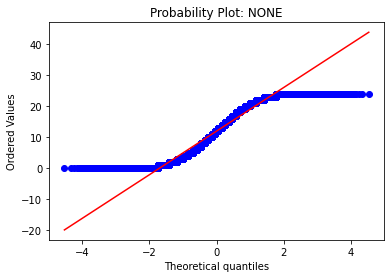

yearsExperience    1.002005
dtype: float64
                             SS      df       MS         F   P-value   F crit
Souce of Variation                                                           
Between Groups          40.2211       4  10.0553  0.193301  0.942004  2.78583
Within Groups       5.20185e+07  999995  52.0187                             
Total               5.20185e+07  999999  52.0186                             


In [60]:
# perform anova test on degree and yearsExperience
perform_anova_test("degree","yearsExperience")

         major  yearsExperience
0      BIOLOGY            58379
1     BUSINESS            58518
2    CHEMISTRY            58875
3      COMPSCI            58382
4  ENGINEERING            58596
5   LITERATURE            58684
6         MATH            57801
7         NONE           532355
8      PHYSICS            58410


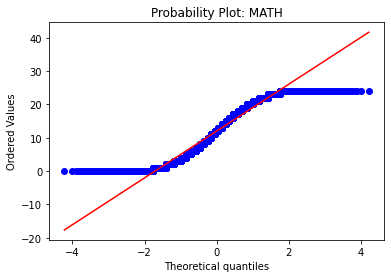

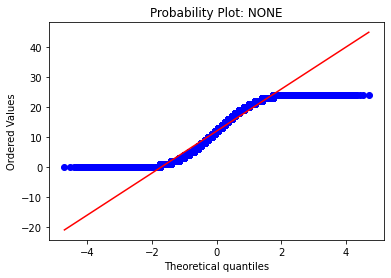

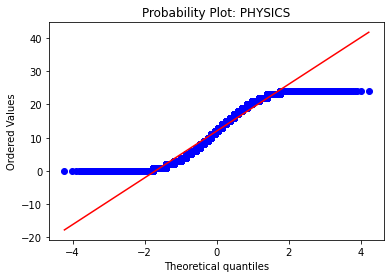

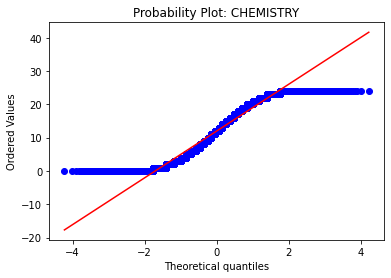

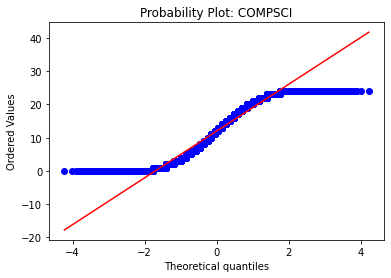

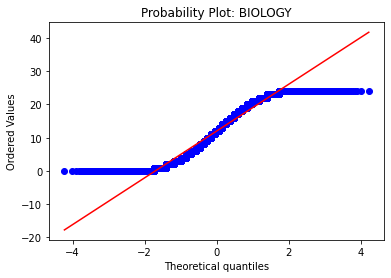

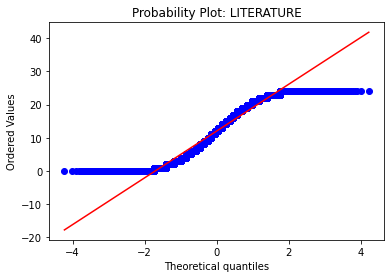

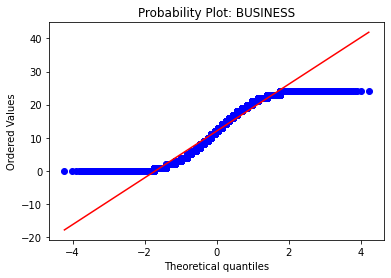

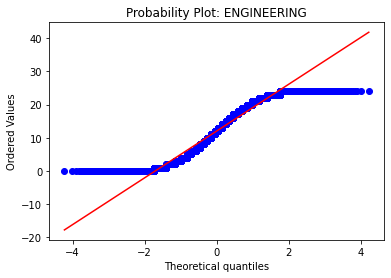

yearsExperience    1.006637
dtype: float64
                             SS      df       MS         F   P-value   F crit
Souce of Variation                                                           
Between Groups          73.9724       8  9.24655  0.177753  0.993928  2.19183
Within Groups       5.20185e+07  999991  52.0189                             
Total               5.20185e+07  999999  52.0186                             


In [61]:
# perform anova test on major and yearsExperience
perform_anova_test("major","yearsExperience")

    industry  yearsExperience
0       AUTO           142943
1  EDUCATION           142819
2    FINANCE           142867
3     HEALTH           142755
4        OIL           142771
5    SERVICE           142639
6        WEB           143206


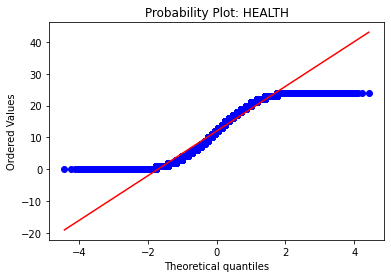

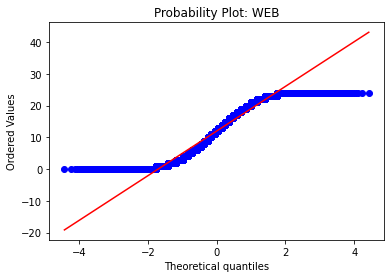

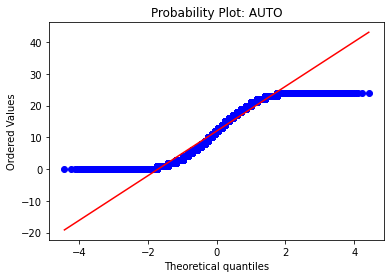

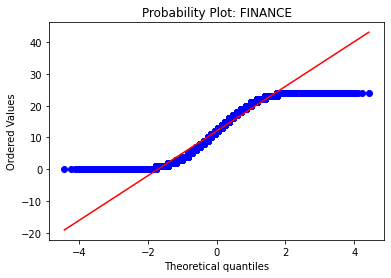

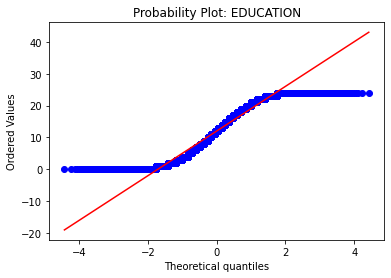

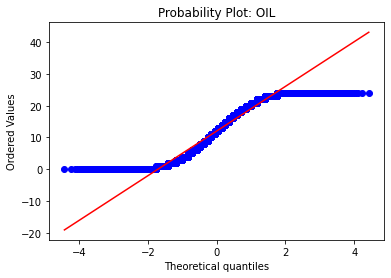

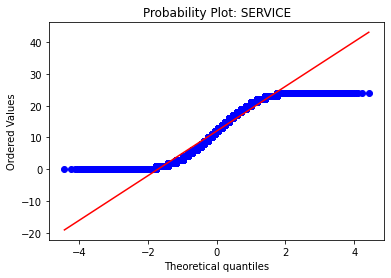

yearsExperience    1.002384
dtype: float64
                             SS      df       MS         F   P-value   F crit
Souce of Variation                                                           
Between Groups           182.34       6    30.39  0.584213  0.743267  2.40824
Within Groups       5.20183e+07  999993  52.0187                             
Total               5.20185e+07  999999  52.0186                             


In [62]:
# perform anova test on industry and yearsExperience
perform_anova_test("industry","yearsExperience")

Since, there are no missing values and all the data are distributed equally. We can start converting the categoricl values to numerical.

## Scaling

### Why scaling is necessary?

* Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.
* If left alone, these algorithms only take in the magnitude of features neglecting the units. 
* The results would vary greatly between different units, 5kg and 5000gms. 
* The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. 
* To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

In [63]:
# Helper function for scaling all the numerical data using MinMaxScalar
def scaled(df_final,col):
  scaler=MinMaxScaler()
  df_final[col]=scaler.fit_transform(df_final[col])
  return df_final

In [64]:
# Making a list of the column names to be scaled 
col=nums
# passing data and column name for scaling
df_scaled=scaled(df_final,col)

# Modelling

### One-hot-encoding

A one-hot encoding can be applied to the categorical representation. This is where the categorical variable is removed and a new binary variable is added for each unique categorical value.

In [65]:
from sklearn.preprocessing import OneHotEncoder

In [66]:
df1=df_final
print(len(df1))
df1=pd.get_dummies(df1)

1000000


In [67]:


df1

yearsExperience  milesFromMetropolis  ...  industry_SERVICE  industry_WEB
0              0.416667             0.838384  ...                 0             0
1              0.125000             0.737374  ...                 0             1
2              0.416667             0.383838  ...                 0             0
3              0.333333             0.171717  ...                 0             0
4              0.333333             0.161616  ...                 0             0
...                 ...                  ...  ...               ...           ...
999995         0.791667             0.949495  ...                 0             0
999996         0.500000             0.353535  ...                 0             0
999997         0.666667             0.818182  ...                 0             0
999998         0.250000             0.050505  ...                 0             0
999999         0.833333             0.111111  ...                 0             0

[1000000 rows x 32 columns]

In [68]:
# Target
df_final.salary

0         0.431894
1         0.335548
2         0.455150
3         0.471761
4         0.541528
            ...   
999995    0.292359
999996    0.531561
999997    0.212625
999998    0.495017
999999    0.292359
Name: salary, Length: 1000000, dtype: float64

In [69]:
# passing features dataframe for one hot encoding process
df1.head()

yearsExperience  milesFromMetropolis  ...  industry_SERVICE  industry_WEB
0         0.416667             0.838384  ...                 0             0
1         0.125000             0.737374  ...                 0             1
2         0.416667             0.383838  ...                 0             0
3         0.333333             0.171717  ...                 0             0
4         0.333333             0.161616  ...                 0             0

[5 rows x 32 columns]

In [70]:

#importing Sklearn library for spliting train dataset into train and test dataset
from sklearn.model_selection import train_test_split
X=df1.drop(labels=["salary"],axis=1)
y=df1.salary
X_train,X_test,y_train,y_test=train_test_split(X.iloc[:50000,],y.iloc[:50000,],test_size=0.3,random_state=1)

In [71]:
# importing necessary libraries for geting metrics of models
from sklearn.metrics import mean_squared_error
from math import sqrt
# Function for calculating RMSE 
def rootmean(y_actual,y_predicted):
  rms = sqrt(mean_squared_error(y_actual, y_predicted))
  return rms
# Function for calculating all the relevant metrics 


### NOTE:
The employee salaries dataset has 1000000 samples.

We have used only 50000 samples for training and testing.

Using complete dataset will take longer time to train the model.

### Linear Regression

In [72]:
%%time
# Fit a Linear Regression model to the train dataset
lr=LinearRegression()
# Import LinearRegressor


# Instantiate the model

# Fit the model to the data
lr.fit(X_train,y_train)
print("training score",lr.score(X_train,y_train))
print("testing score",lr.score(X_test,y_test))
# print score of the model by calling function
y_pred=lr.predict(X_test)
print("RMSE TEST :",rootmean(y_test,y_pred))

training score 0.7417582978261753
testing score 0.740527682936418
RMSE TEST : 0.06568736284337709
CPU times: user 81 ms, sys: 50.7 ms, total: 132 ms
Wall time: 87.6 ms


### Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

In [73]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf=RandomForestRegressor()

# Fit the model to the data
rf.fit(X_train,y_train)
# print score of the model by calling function
print("training score",rf.score(X_train,y_train))
print("testing score",rf.score(X_test,y_test))
y_pred=rf.predict(X_test)
print("RMSE TEST :",rootmean(y_test,y_pred))




training score 0.9587448153805084
testing score 0.7187061970620758
RMSE TEST : 0.06839374641290423
CPU times: user 14.2 s, sys: 199 ms, total: 14.4 s
Wall time: 14.4 s


### Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error.
it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [74]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
gbr=GradientBoostingRegressor()
# Fit the model to the data
gbr.fit(X_train,y_train)
# print score of the model by calling function
print("training score",gbr.score(X_train,y_train))
print("testing score",gbr.score(X_test,y_test))
y_pred=gbr.predict(X_test)
print("RMSE TEST :",rootmean(y_test,y_pred))



training score 0.7532216196704662
testing score 0.7463639810512941
RMSE TEST : 0.06494440996490915
CPU times: user 2.99 s, sys: 6.17 ms, total: 2.99 s
Wall time: 2.99 s


### DecisionTree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

In [75]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
dt=DecisionTreeRegressor()
# Fit the model to the data
dt.fit(X_train,y_train)
# print score of the model by calling function
print("training score",dt.score(X_train,y_train))
print("testing score",dt.score(X_test,y_test))
y_pred=dt.predict(X_test)
print("RMSE TEST :",rootmean(y_test,y_pred))
# visualizing the importance of features.



training score 0.9973134852431108
testing score 0.4758585342217243
RMSE TEST : 0.09335994151419456
CPU times: user 235 ms, sys: 2.77 ms, total: 238 ms
Wall time: 239 ms


### AdaBoost Regressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction

In [76]:
%%time

# Fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
# Instantiate the model
abr=AdaBoostRegressor()
# Fit the model to the data
abr.fit(X_train,y_train)
# print score of the model by calling function
print("training score",abr.score(X_train,y_train))
print("testing score",abr.score(X_test,y_test))
y_pred=abr.predict(X_test)
print("RMSE TEST :",rootmean(y_test,y_pred))
# visualizing the importance of features.


training score 0.567802464201147
testing score 0.5670339261569297
RMSE TEST : 0.08485222702240906
CPU times: user 3.01 s, sys: 36.8 ms, total: 3.05 s
Wall time: 3.03 s


### XGBoost

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

In [77]:
%%time
# Fit a XGB Regressor model to the train dataset

# Import XGBRegressor
import xgboost as xg
# Instantiate the model
xgb_r = xg.XGBRegressor()
# Fit the model to the data
xgb_r.fit(X_train,y_train)
# print score of the model by calling function
print("training score",xgb_r.score(X_train,y_train))
print("testing score",xgb_r.score(X_test,y_test))
y_pred=xgb_r.predict(X_test)
print("RMSE TEST :",rootmean(y_test,y_pred))
# visualizing the importance of features.


[08:55:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
training score 0.75319043914462
testing score 0.745760074516361
RMSE TEST : 0.06502168021149334
CPU times: user 2.98 s, sys: 27.5 ms, total: 3.01 s
Wall time: 3.1 s


HYPER PARAMETER TUNING

### RamdomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.
 1. The first step is to write the parameters that we want to consider
 2. From these parameters select the best ones.(which are printed in output)

In [100]:

def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV
  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations
  random = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
  # Fit the random search model
  random.fit(X_train, y_train)
  print(random.best_params_)

In [ ]:

# for random forest classifier
# create parameters dict for tunning
rf_para_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10,12],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False],
            }

# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestRegressor(),X_train, y_train, param_grid=rf_para_grid)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time= 1.3min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time= 1.3min
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1800; total time= 1.3min
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   5.0s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   4.1s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   4.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10

{'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': True} //rfc


In [ ]:
# create GradientBoostRegressor parameters dict for tunning
GBR_para_grid={
    'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 1000, num = 20)],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [x for x in range(2,10)],
               'min_samples_leaf': [1, 2, 4,6],
}
# passing data for hyper parameter tunning with Randomized search cv
random_Search(GradientBoostingRegressor(),X_train, y_train, param_grid=GBR_para_grid)

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   4.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   4.2s
[CV] END max_depth=90, min_samples_leaf=2, min_samples_split=7, n_estimators=550; total time= 1.0min
[CV] END max_depth=90, min_samples_leaf=2, min_samples_split=7, n_estimators=550; total time= 1.0min
[CV] END max_depth=90, min_samples_leaf=1, min_samples_split=7, n_estimators=350; total time=  40.1s
[CV] END max_depth=90, min_samples_leaf=1, min_samples_split=7, n_estimators=350; total time=  39.0s
[CV] END max_depth=90, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  57.1s
[CV] END max_depth=90, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  57.4s
[CV] END max_depth=60, min_samples_leaf=6, min_samples_split=6, n_estimators=650; total time= 1.2min
[CV] END max_depth=60, min_samp

In [103]:
# create DecisionTreeRegressor parameters dict for tunning
DTC_para_grid={
    'splitter':["best","random"],
    'max_depth':[1,3,5,7,9,10,12],
    'min_samples_split': [x for x in range(2,12)],
    'min_weight_fraction_leaf':[0.0,0.1,0.2,0.3,0.4,0.5],
    'max_features':["auto","log2","sqrt",None],
    'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90]
}
# passing data for hyper parameter tunning with Randomized search cv
random_Search(DecisionTreeRegressor(),X_train, y_train, param_grid=DTC_para_grid)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_split=8, min_weight_fraction_leaf=0.1, splitter=random; total time=   0.0s
[CV] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_split=8, min_weight_fraction_leaf=0.1, splitter=random; total time=   0.0s
[CV] END max_depth=7, max_features=log2, max_leaf_nodes=10, min_samples_split=8, min_weight_fraction_leaf=0.1, splitter=random; total time=   0.0s
[CV] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_split=3, min_weight_fraction_leaf=0.4, splitter=best; total time=   0.0s
[CV] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_split=3, min_weight_fraction_leaf=0.4, splitter=best; total time=   0.0s
[CV] END max_depth=1, max_features=auto, max_leaf_nodes=70, min_samples_split=3, min_weight_fraction_leaf=0.4, splitter=best; total time=   0.0s
[CV] END max_depth=5, max_features=log2, max_leaf_nodes=40, m

In [97]:
# create AdaBoostRegressor parameters dict for tunning
Ada_para_grid={
    'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 2000, num = 20)],
    'learning_rate':[0.0001,.001,.01,0.1,1.0]
}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(AdaBoostRegressor(),X_train,y_train,param_grid=Ada_para_grid)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] END ..............learning_rate=0.0001, n_estimators=50; total time=   1.4s
[CV] END ..............learning_rate=0.0001, n_estimators=50; total time=   1.4s
[CV] END .............learning_rate=0.0001, n_estimators=152; total time=   4.4s
[CV] END .............learning_rate=0.0001, n_estimators=152; total time=   4.2s
[CV] END .............learning_rate=0.0001, n_estimators=255; total time=   7.1s
[CV] END .............learning_rate=0.0001, n_estimators=255; total time=   7.4s
[CV] END .............learning_rate=0.0001, n_estimators=357; total time=  10.0s
[CV] END .............learning_rate=0.0001, n_estimators=357; total time=   9.9s
[CV] END .............learning_rate=0.0001, n_estimators=460; total time=  13.0s
[CV] END .............learning_rate=0.0001, n_estimators=460; total time=  12.7s
[CV] END .............learning_rate=0.0001, n_estimators=563; total time=  15.6s
[CV] END .............learning_rate=0.0001, n_

In [98]:
# create XGBoostRegressor parameters dict for tunning
XGB_para_grid={
    'learning_rate':[0.05,0.10,.15,0.20,0.25,0.30],
    'max_depth': [int(x) for x in np.linspace(1, 15, num = 2)],
    'gamma':[0.0,0.1,0.2,0.3,0.4,0.5],
    'colsample_bytree':[0.3,0.4,0.5,0.7],
    'min_child_weight':[1,3,5,7]
}
# passing data for hyper parameter tunning with Randomized search cv
random_Search(xg.XGBRegressor(),X_train,y_train,param_grid=XGB_para_grid)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[13:52:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=5; total time=   3.1s
[13:52:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=5; total time=   3.1s
[13:52:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=1, min_child_weight=5; total time=   0.6s
[13:52:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=1, min_child_we

{'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.25, 'gamma': 0.1, 'colsample_bytree': 0.5}//xgb

### NOTE:

you can use any one of RandomizedSearchCv or GridSearchCV, both works fine.

In [104]:
##checking for all the regressors and their scores after hyperparameter tuning
# Fit a Linear Regression model to the train dataset
lr=LinearRegression()
# Import LinearRegressor


# Instantiate the model

# Fit the model to the data
lr.fit(X_train,y_train)
print("training score for linear regression",lr.score(X_train,y_train))
print("testing score for linear regression",lr.score(X_test,y_test))
# print score of the model by calling function
y_pred=lr.predict(X_test)
print("RMSE TEST FOR LINEAR REGRESSION :",rootmean(y_test,y_pred))
print("-----------------------------------------------------")
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf=RandomForestRegressor(n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features ='sqrt', max_depth= 110, bootstrap= True)
# Fit the model to the data
rf.fit(X_train,y_train)
# print score of the model by calling function
print("training score for random forest",rf.score(X_train,y_train))
print("testing score for random forest",rf.score(X_test,y_test))
y_pred=rf.predict(X_test)
print("RMSE TEST FOR RANDOM FOREST:",rootmean(y_test,y_pred))
print("-----------------------------------------------------")
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
gbr=GradientBoostingRegressor(n_estimators= 350, min_samples_split= 9, min_samples_leaf= 4, max_depth=10)
# Fit the model to the data
gbr.fit(X_train,y_train)
# print score of the model by calling function
print("training score for gradient boosting",gbr.score(X_train,y_train))
print("testing score for gradient boostiing",gbr.score(X_test,y_test))
y_pred=gbr.predict(X_test)
print("RMSE TEST FOR GRADIENT BOOSTING:",rootmean(y_test,y_pred))
print("-----------------------------------------------------")
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# Instantiate the model
dt=DecisionTreeRegressor(splitter='random', min_weight_fraction_leaf= 0.0, min_samples_split=3,max_leaf_nodes=90, max_features= None, max_depth= 10)
# Fit the model to the data
dt.fit(X_train,y_train)
# print score of the model by calling function
print("training score for decision tree",dt.score(X_train,y_train))
print("testing score for decision tree",dt.score(X_test,y_test))
y_pred=dt.predict(X_test)
print("RMSE TEST FOR DECISION TREE",rootmean(y_test,y_pred))
print("-----------------------------------------------------")
# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
# Instantiate the model
abr=AdaBoostRegressor(n_estimators=50,learning_rate= 1.0)
# Fit the model to the data
abr.fit(X_train,y_train)
# print score of the model by calling function
print("training score for adaboost",abr.score(X_train,y_train))
print("testing score for adaboost",abr.score(X_test,y_test))
y_pred=abr.predict(X_test)
print("RMSE TEST FOR ADABOOST",rootmean(y_test,y_pred))
print("-----------------------------------------------------")
import xgboost as xg
# Instantiate the model
xgb_r = xg.XGBRegressor(min_child_weight=3, max_depth= 15, learning_rate=0.25,gamma=0.1,colsample_bytree=0.5)
# Fit the model to the data
xgb_r.fit(X_train,y_train)
# print score of the model by calling function
print("training score for xgboost",xgb_r.score(X_train,y_train))
print("testing score for xgboost",xgb_r.score(X_test,y_test))
y_pred=xgb_r.predict(X_test)
print("RMSE TEST FOR XGBOOST ",rootmean(y_test,y_pred))
print("-----------------------------------------------------")
  

training score for linear regression 0.7417582978261753
testing score for linear regression 0.740527682936418
RMSE TEST FOR LINEAR REGRESSION : 0.06568736284337709
-----------------------------------------------------
training score for random forest 0.8389010485639407
testing score for random forest 0.7409643659669116
RMSE TEST FOR RANDOM FOREST: 0.06563206477546657
-----------------------------------------------------
training score for gradient boosting 0.9474738664873716
testing score for gradient boostiing 0.709410766178922
RMSE TEST FOR GRADIENT BOOSTING: 0.06951460694265209
-----------------------------------------------------
training score for decision tree 0.6301539606807752
testing score for decision tree 0.617207732307876
RMSE TEST FOR DECISION TREE 0.07978438281001471
-----------------------------------------------------
training score for adaboost 0.5668156778636929
testing score for adaboost 0.566003223606474
RMSE TEST FOR ADABOOST 0.08495316497633033
-------------------

### Now working with the test dataset provided




In [105]:
# test data 
df_test

jobType       degree  ... yearsExperience milesFromMetropolis
0              MANAGER  HIGH_SCHOOL  ...              22                  73
1               JUNIOR         NONE  ...              20                  47
2                  CTO      MASTERS  ...              17                   9
3              MANAGER  HIGH_SCHOOL  ...              14                  96
4               JUNIOR     DOCTORAL  ...              10                  44
...                ...          ...  ...             ...                 ...
999995  VICE_PRESIDENT    BACHELORS  ...              14                   3
999996         MANAGER         NONE  ...              20                  67
999997         JANITOR         NONE  ...               1                  91
999998             CTO     DOCTORAL  ...              14                  63
999999          JUNIOR         NONE  ...              16                  31

[1000000 rows x 6 columns]

In [106]:
def scale(df,col):
  scaler=MinMaxScaler()
  df[col]=scaler.fit_transform(df[col])
  return df

In [109]:
# passing test data for scaling, similarly as done for train data
col=nums
col.pop()
df_test=scale(df_test,col)

In [110]:
# passing test dataset for one hot encoding process
df_test=pd.get_dummies(df_test)

In [111]:
df_test

yearsExperience  milesFromMetropolis  ...  industry_SERVICE  industry_WEB
0              0.916667             0.737374  ...                 0             0
1              0.833333             0.474747  ...                 0             0
2              0.708333             0.090909  ...                 0             0
3              0.583333             0.969697  ...                 0             0
4              0.416667             0.444444  ...                 0             0
...                 ...                  ...  ...               ...           ...
999995         0.583333             0.030303  ...                 0             0
999996         0.833333             0.676768  ...                 0             0
999997         0.041667             0.919192  ...                 0             0
999998         0.583333             0.636364  ...                 0             0
999999         0.666667             0.313131  ...                 0             0

[1000000 rows x 31 columns]

In [113]:
# Perforn the prediction on the test dataset
#using xgboost as it gives us better results are compared to other models.
xgb_r = xg.XGBRegressor(min_child_weight=3, max_depth= 15, learning_rate=0.25,gamma=0.1,colsample_bytree=0.5).fit(X_train,y_train)
y_pred=xgb_r.predict(df_test)
y_pred

[14:37:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.3680418 , 0.31391978, 0.5884076 , ..., 0.18703759, 0.51985204,
       0.383961  ], dtype=float32)

In [114]:
# creating a dataframe of predicted results 
df_pred=pd.DataFrame(y_pred)

In [115]:

# predicted values in dataframe
df_pred

0
0       0.368042
1       0.313920
2       0.588408
3       0.350152
4       0.395196
...          ...
999995  0.561597
999996  0.350045
999997  0.187038
999998  0.519852
999999  0.383961

[1000000 rows x 1 columns]

### Conclusion
According to this model, the predicted value we got,
matches with the actual target values.The model is performing well.
Even though we used only a subset of the dataset,the model may perform much better when trained on complete dataset.
We have performed EDA, preprocessing, built different models, visualized feature importance, did hyper parameter tunning of each model and did prediction.
We got an accuracy of about 75% which may increase if we take the entire dataset however it will take a lot of time for doing the same.
